In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MSMRD as mrd
import MSMRD.integrators as integrators
import MSMRD.potentials as potentials
import pickle
%matplotlib inline

In [2]:
#define MSMmodel class to read in data
class MSMmodel(object):    
    def __init__(self, tmatrix, centers, parameters):
        self.tmatrix = tmatrix
        self.centers= centers
        self.parameters = parameters

In [3]:
model = pickle.load(open('../data/asym2D_longTraj_lag5_Nangular12_50Trajs_10divisions.p'))

In [4]:
T = np.copy(model.tmatrix)
for i in range(model.parameters['NCenters']):
    for j in range(model.parameters['NangularPartitions']):
        T[i,-j-1] = 0
for i in range(len(T)):
    T[i,:] /= np.sum(T[i,:])
#print np.sum(T[:,-15:],axis=1)

In [5]:
MSMlag = 1
msm = mrd.MSM(T, model.centers, lagtime=MSMlag)

In [6]:
#overwrite exit states, now there is only 1 state from which the MSM can be exited
msm.exitStates = np.arange(model.parameters['NCenters'] + (model.parameters['entryRings']+model.parameters['exitRings'])*model.parameters['NangularPartitions'], model.parameters['NCenters'] + (model.parameters['entryRings']+model.parameters['exitRings']+1)*model.parameters['NangularPartitions'])

In [7]:
np.random.seed()
p1 = mrd.particle(np.array([0.,0.]), 1.0)
ringboundary = mrd.reflectiveRing(4.)
integrator = integrators.MSMRDexitSampling(msm, 4.0, p1, 0.1, model.parameters)
sim = mrd.simulation(integrator)

In [18]:
mfpts = np.zeros([9,9])
for i in range(9):
    for j  in range(9):
        if i != j:
            fpts = []
            for runs in range(10000):           
                integrator.p.position = np.array([0.,0.])
                integrator.MSM.state = i
                integrator.MSMactive = True
                integrator.MSM.exit = False
                fpts.append(sim.run_mfpt_state(j))
            mfpts[i,j] = np.mean(fpts)
            print str(i) + ' to ' + str(j) + ' done!' 

0 to 1 done!
0 to 2 done!
0 to 3 done!
0 to 4 done!
0 to 5 done!
0 to 6 done!
0 to 7 done!
0 to 8 done!
1 to 0 done!
1 to 2 done!
1 to 3 done!
1 to 4 done!
1 to 5 done!
1 to 6 done!
1 to 7 done!
1 to 8 done!
2 to 0 done!
2 to 1 done!
2 to 3 done!
2 to 4 done!
2 to 5 done!
2 to 6 done!
2 to 7 done!
2 to 8 done!
3 to 0 done!
3 to 1 done!
3 to 2 done!
3 to 4 done!
3 to 5 done!
3 to 6 done!
3 to 7 done!
3 to 8 done!
4 to 0 done!
4 to 1 done!
4 to 2 done!
4 to 3 done!
4 to 5 done!
4 to 6 done!
4 to 7 done!
4 to 8 done!
5 to 0 done!
5 to 1 done!
5 to 2 done!
5 to 3 done!
5 to 4 done!
5 to 6 done!
5 to 7 done!
5 to 8 done!
6 to 0 done!
6 to 1 done!
6 to 2 done!
6 to 3 done!
6 to 4 done!
6 to 5 done!
6 to 7 done!
6 to 8 done!
7 to 0 done!
7 to 1 done!
7 to 2 done!
7 to 3 done!
7 to 4 done!
7 to 5 done!
7 to 6 done!
7 to 8 done!
8 to 0 done!
8 to 1 done!
8 to 2 done!
8 to 3 done!
8 to 4 done!
8 to 5 done!
8 to 6 done!
8 to 7 done!


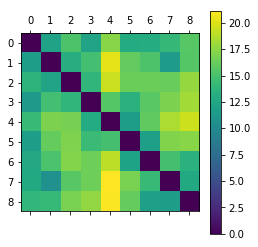

In [19]:
plt.matshow(mfpts)
plt.colorbar()

In [25]:
#Prepare data to be extracted to file
#For this we need the position of the cluster centers as well as the information about the angles of the exit states
class MSMmodel(object):    
    def __init__(self, tmatrix, centers, parameters):
        self.tmatrix = tmatrix
        self.centers= centers
        self.parameters = parameters

In [26]:
import pickle
MFPTs_reference = pickle.load(open('MTTs_convergence.p'))

/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


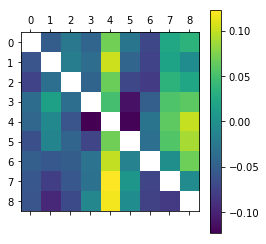

In [27]:
plt.matshow((mfpts - MFPTs_reference[48][:9,:9])/mfpts)
plt.colorbar()

In [28]:
import pyemma
hybrid_model = pickle.load(open('../data/asym2D_longTraj_lag5_Nangular12_50Trajs_10divisions.p'))
msm = pyemma.msm.markov_model(hybrid_model.tmatrix)
mfpts_hybrid = np.zeros([9,9])
for i in range(9):
    for j in range(9):
        if i != j:
            mfpts_hybrid[i,j] = msm.mfpt(i,j)*0.1

/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


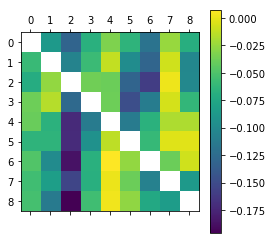

In [33]:
plt.matshow((mfpts - mfpts_hybrid)/mfpts)
plt.colorbar()

In [48]:
mfpts_ran = pickle.load(open('mfpts_10000runs_01dt.p', 'r'))
print mfpts_ran

[[  0.        13.357609  18.730289  13.69119   19.078176  14.448393
   15.093966  15.098695  18.02212 ]
 [ 12.712444   0.        15.2159    16.277931  23.052502  19.125108
   18.6095    12.030436  18.497734]
 [ 15.250106  12.510726   0.        14.793249  22.268041  20.447974
   20.950086  17.475031  22.231019]
 [ 11.7506    15.828204  16.378577   0.        17.326401  16.511032
   19.104767  18.490729  21.493304]
 [ 15.241202  19.790668  22.02675   14.945307   0.        13.189382
   18.447262  21.126762  22.421584]
 [ 12.764985  18.029552  21.996483  16.30657   15.485547   0.        12.960403
   18.735475  18.982384]
 [ 13.653378  17.677889  22.690255  19.05791   20.405679  12.711668   0.
   16.751991  14.132404]
 [ 13.787091  11.342779  19.515337  18.817573  23.786176  18.889887
   16.621495   0.        13.919056]
 [ 15.023811  16.862533  22.40346   20.306202  23.454469  17.503041
   12.620242  13.259925   0.      ]]


/srv/public/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


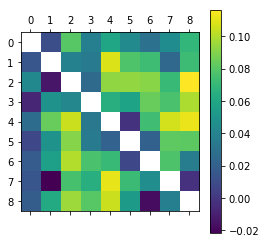

In [51]:
plt.matshow((mfpts_ran-mfpts_hybrid)/mfpts_ran)
plt.colorbar()

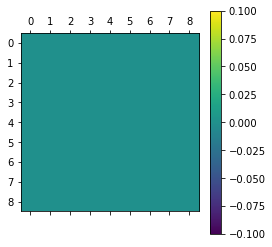

In [43]:
plt.matshow(mfpts_ran)
plt.colorbar()

In [41]:
print mfpts_ran

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
